# Data Analisys

In [113]:
library(ggplot2)
library(dplyr)


## Load Data


In [114]:
data <- read.csv("./dataset/HCV-Egy-Data.csv")


In [115]:
dim(data)


[1] 1385   29

In [116]:
head(data)


,Age,Gender,BMI,Fever,Nausea.Vomting,Headache,Diarrhea,Fatigue.generalized.bone.ache,Jaundice,Epigastric.pain,⋯,ALT.36,ALT.48,ALT.after.24.w,RNA.Base,RNA.4,RNA.12,RNA.EOT,RNA.EF,Baseline.histological.Grading,Baselinehistological.staging
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,56,1,35,2,1,1,1,2,2,2,⋯,5,5,5,655330,634536,288194,5,5,13,2
2,46,1,29,1,2,2,1,2,2,1,⋯,57,123,44,40620,538635,637056,336804,31085,4,2
3,57,1,33,2,2,2,2,1,1,1,⋯,5,5,5,571148,661346,5,735945,558829,4,4
4,49,2,33,1,2,1,2,1,2,1,⋯,48,77,33,1041941,449939,585688,744463,582301,10,3
5,59,1,32,1,1,2,1,2,2,2,⋯,94,90,30,660410,738756,3731527,338946,242861,11,1
6,58,2,22,2,2,2,1,2,2,1,⋯,73,114,29,1157452,1086852,5,5,5,4,4


In [117]:
colSums(is.na(data))


Age                        Gender 
                            0                             0 
                          BMI                         Fever 
                            0                             0 
               Nausea.Vomting                      Headache 
                            0                             0 
                     Diarrhea Fatigue.generalized.bone.ache 
                            0                             0 
                     Jaundice               Epigastric.pain 
                            0                             0 
                          WBC                           RBC 
                            0                             0 
                          HGB                      Platelet 
                            0                             0 
                        AST.1                         ALT.1 
                            0                             0 
                        ALT.4                        ALT.12 
                            0                             0 
                       ALT.24                        ALT.36 
                            0                             0 
                       ALT.48                ALT.after.24.w 
                            0                             0 
                     RNA.Base                         RNA.4 
                            0                             0 
                       RNA.12                       RNA.EOT 
                            0                             0 
                       RNA.EF Baseline.histological.Grading 
                            0                             0 
 Baselinehistological.staging 
                            0

In [118]:
row_counts <- table(apply(data, 1, paste, collapse = ","))

# Mostrar el resultado
cat("With no duplicates:", dim(row_counts))
# head(row_counts)


With no duplicates: 1385

In [119]:
tipos_de_variables <- sapply(data, class)
print(tipos_de_variables)


                          Age                        Gender 
                    "integer"                     "integer" 
                          BMI                         Fever 
                    "integer"                     "integer" 
               Nausea.Vomting                      Headache 
                    "integer"                     "integer" 
                     Diarrhea Fatigue.generalized.bone.ache 
                    "integer"                     "integer" 
                     Jaundice               Epigastric.pain 
                    "integer"                     "integer" 
                          WBC                           RBC 
                    "integer"                     "numeric" 
                          HGB                      Platelet 
                    "integer"                     "numeric" 
                        AST.1                         ALT.1 
                    "integer"                     "integer" 
                        

In [120]:
summary(data)


      Age            Gender          BMI            Fever       Nausea.Vomting 
 Min.   :32.00   Min.   :1.00   Min.   :22.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:39.00   1st Qu.:1.00   1st Qu.:25.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :46.00   Median :1.00   Median :29.00   Median :2.000   Median :2.000  
 Mean   :46.32   Mean   :1.49   Mean   :28.61   Mean   :1.516   Mean   :1.503  
 3rd Qu.:54.00   3rd Qu.:2.00   3rd Qu.:32.00   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :61.00   Max.   :2.00   Max.   :35.00   Max.   :2.000   Max.   :2.000  
    Headache        Diarrhea     Fatigue.generalized.bone.ache    Jaundice    
 Min.   :1.000   Min.   :1.000   Min.   :1.000                 Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000                 1st Qu.:1.000  
 Median :1.000   Median :2.000   Median :1.000                 Median :2.000  
 Mean   :1.496   Mean   :1.503   Mean   :1.499                 Mean   :1.501  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.00

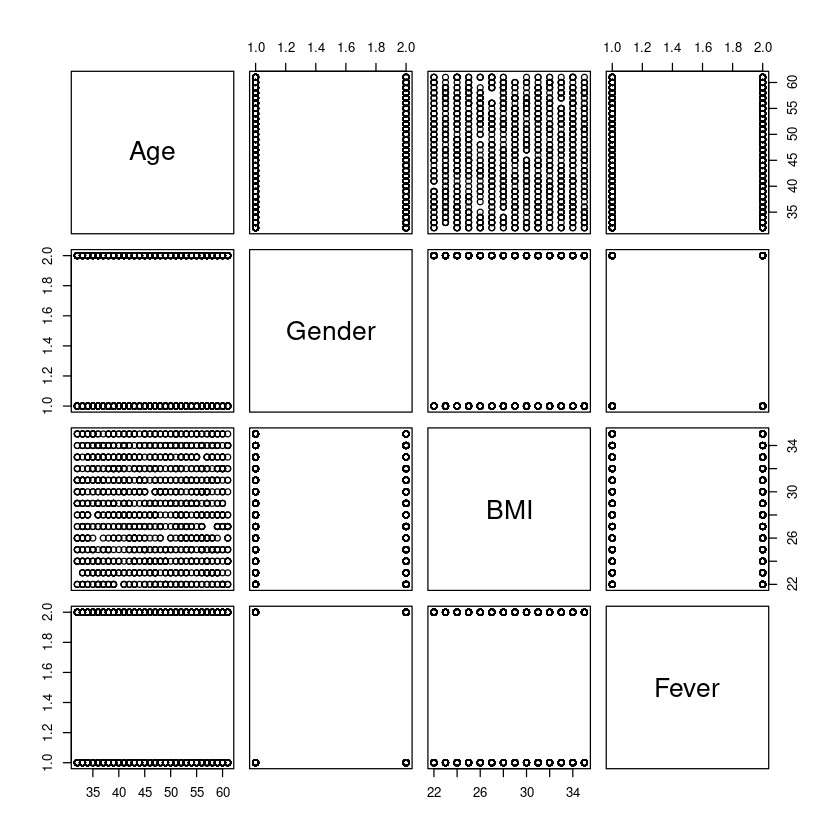

In [121]:
pairs(data[, c("Age", "Gender", "BMI", "Fever")])


In [122]:
print(colnames(data))


 [1] "Age"                           "Gender"                       
 [3] "BMI"                           "Fever"                        
 [5] "Nausea.Vomting"                "Headache"                     
 [7] "Diarrhea"                      "Fatigue.generalized.bone.ache"
 [9] "Jaundice"                      "Epigastric.pain"              
[11] "WBC"                           "RBC"                          
[13] "HGB"                           "Platelet"                     
[15] "AST.1"                         "ALT.1"                        
[17] "ALT.4"                         "ALT.12"                       
[19] "ALT.24"                        "ALT.36"                       
[21] "ALT.48"                        "ALT.after.24.w"               
[23] "RNA.Base"                      "RNA.4"                        
[25] "RNA.12"                        "RNA.EOT"                      
[27] "RNA.EF"                        "Baseline.histological.Grading"
[29] "Baselinehistological.staging

In [123]:
ordinal_features <- c(
    "Baselinehistological.staging",
    "Baseline.histological.Grading"
)
categorical_features <- c(
    "Gender",
    "Fever",
    "Nausea.Vomting",
    "Headache",
    "Diarrhea",
    "Fatigue.generalized.bone.ache",
    "Jaundice",
    "Epigastric.pain"
)


continius_features <- c(
    "WBC", "HGB", "RBC", "Age",
    "BMI", "Platelet"
)

time_series_1 <- c("ALT.1", "ALT.4", "ALT.12", "ALT.24", "ALT.36", "ALT.48")

not_interested <- c("AST.1", "RNA.EOT", "ALT.after.24.w", "RNA.Base", "RNA.4", "RNA.12", "RNA.EOT", "RNA.EF")
time_series_2 <- c("RNA.Base", "RNA.4", "RNA.12")


## Preprocesing

### Delete not useful info

In [124]:
data <- data[, !(colnames(data) %in% not_interested)]
colnames(data)


[1] "Age"                           "Gender"                       
 [3] "BMI"                           "Fever"                        
 [5] "Nausea.Vomting"                "Headache"                     
 [7] "Diarrhea"                      "Fatigue.generalized.bone.ache"
 [9] "Jaundice"                      "Epigastric.pain"              
[11] "WBC"                           "RBC"                          
[13] "HGB"                           "Platelet"                     
[15] "ALT.1"                         "ALT.4"                        
[17] "ALT.12"                        "ALT.24"                       
[19] "ALT.36"                        "ALT.48"                       
[21] "Baseline.histological.Grading" "Baselinehistological.staging"

## TO be interpret

In [125]:
for (categoria in categorical_features) {
  if (categoria != "Gender") {
    data[[categoria]] <- ifelse(data[[categoria]] == 1, "Yes", "No")
  } else {
    data[[categoria]] <- ifelse(data[[categoria]] == 1, "Male", "Female")
  }
}


In [126]:
cols_continious <- sapply(data, is.numeric)
print(cols_continious)
class(cols_continious)


                          Age                        Gender 
                         TRUE                         FALSE 
                          BMI                         Fever 
                         TRUE                         FALSE 
               Nausea.Vomting                      Headache 
                        FALSE                         FALSE 
                     Diarrhea Fatigue.generalized.bone.ache 
                        FALSE                         FALSE 
                     Jaundice               Epigastric.pain 
                        FALSE                         FALSE 
                          WBC                           RBC 
                         TRUE                          TRUE 
                          HGB                      Platelet 
                         TRUE                          TRUE 
                        ALT.1                         ALT.4 
                         TRUE                          TRUE 
                       A

[1] "logical"

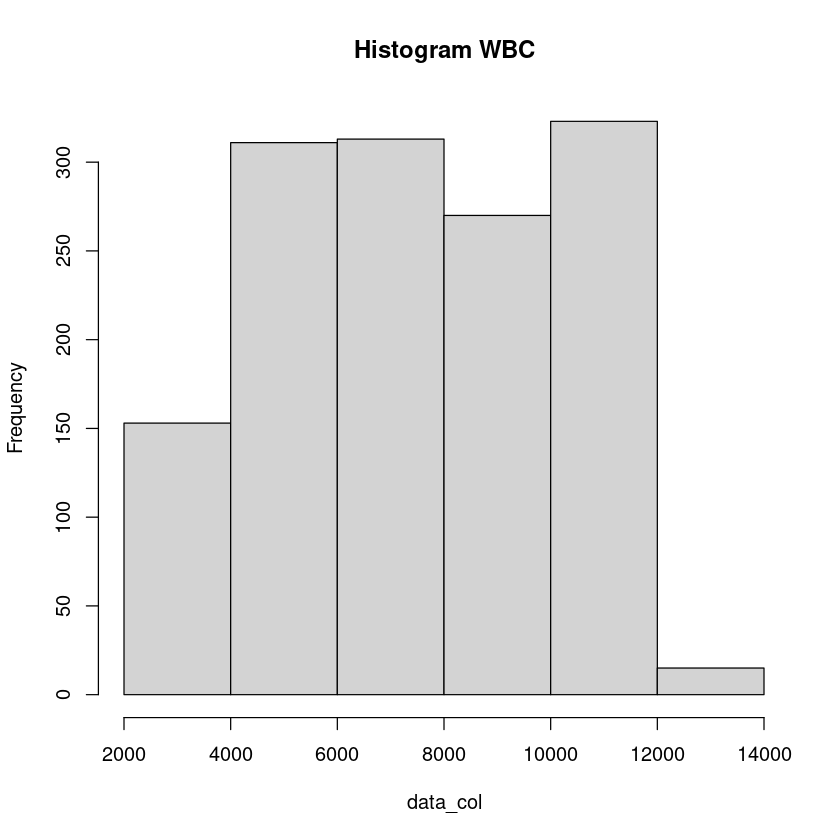

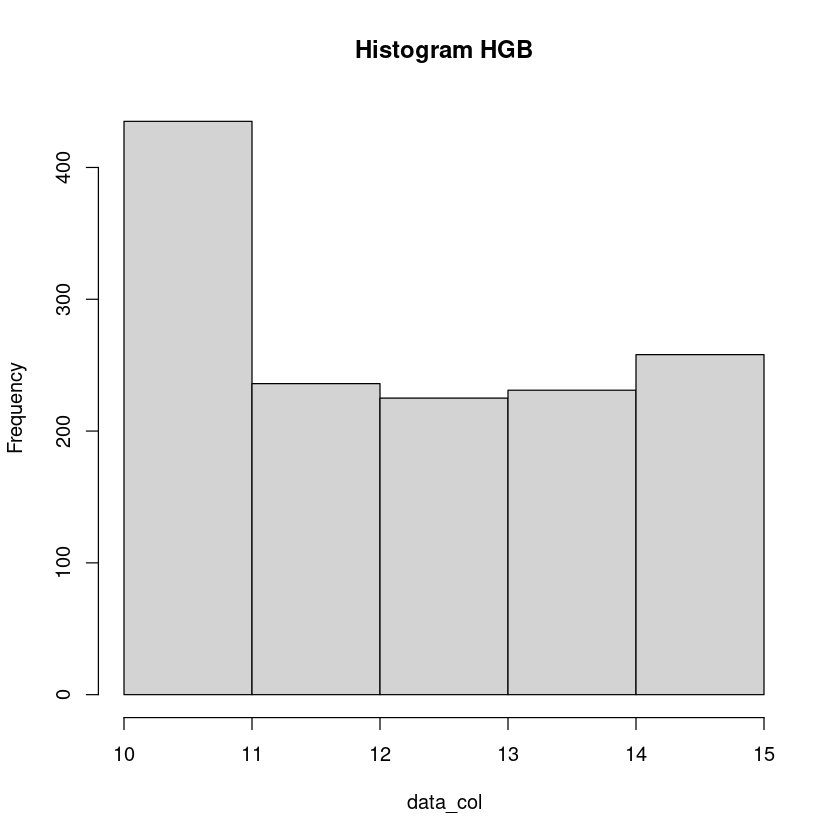

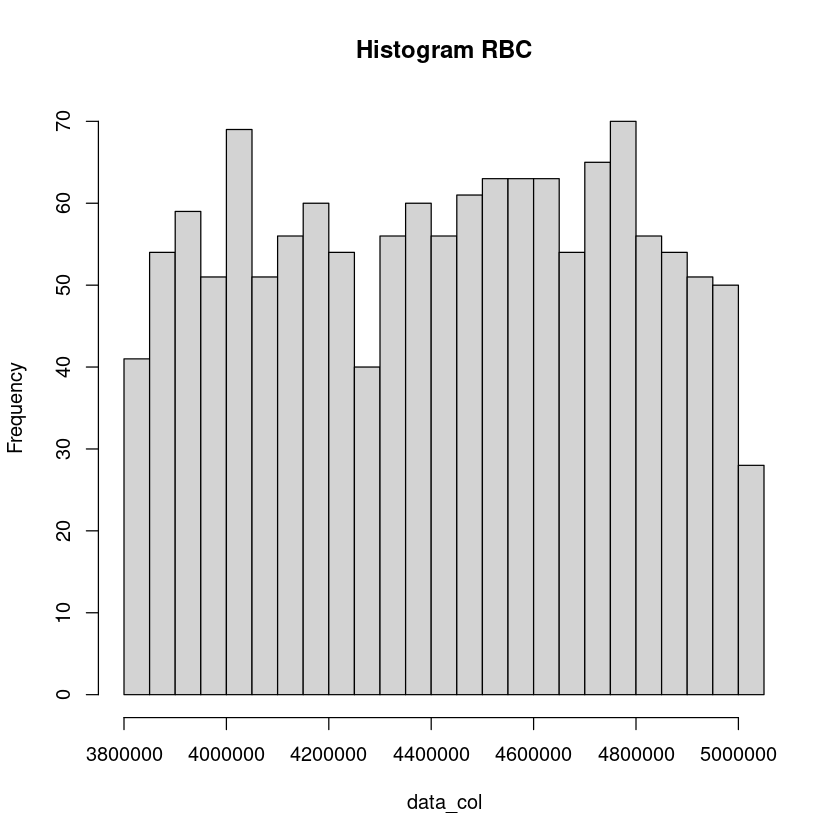

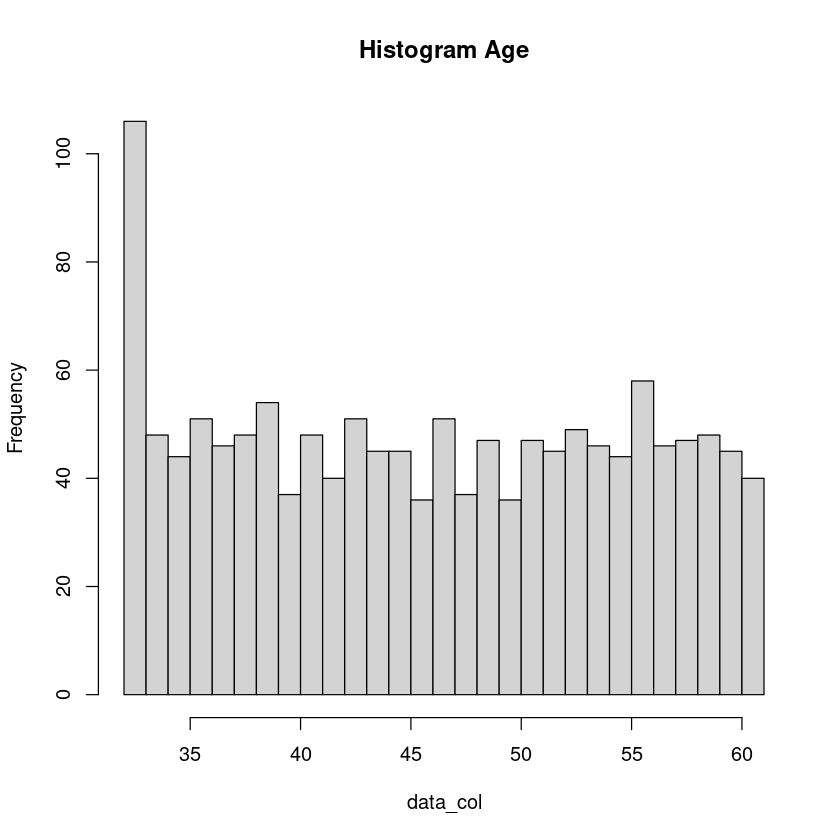

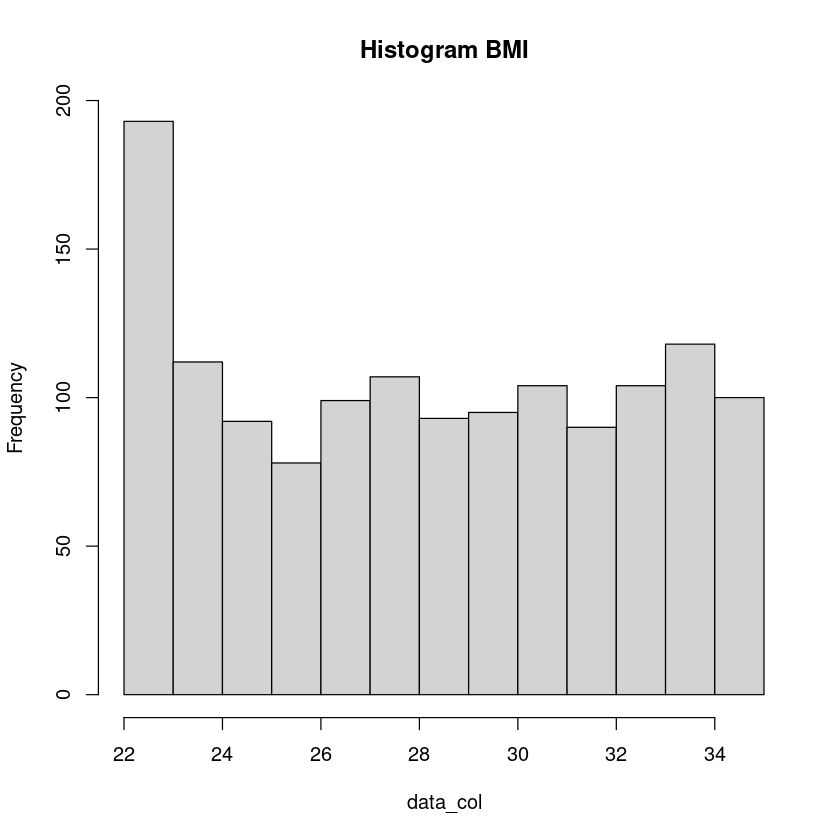

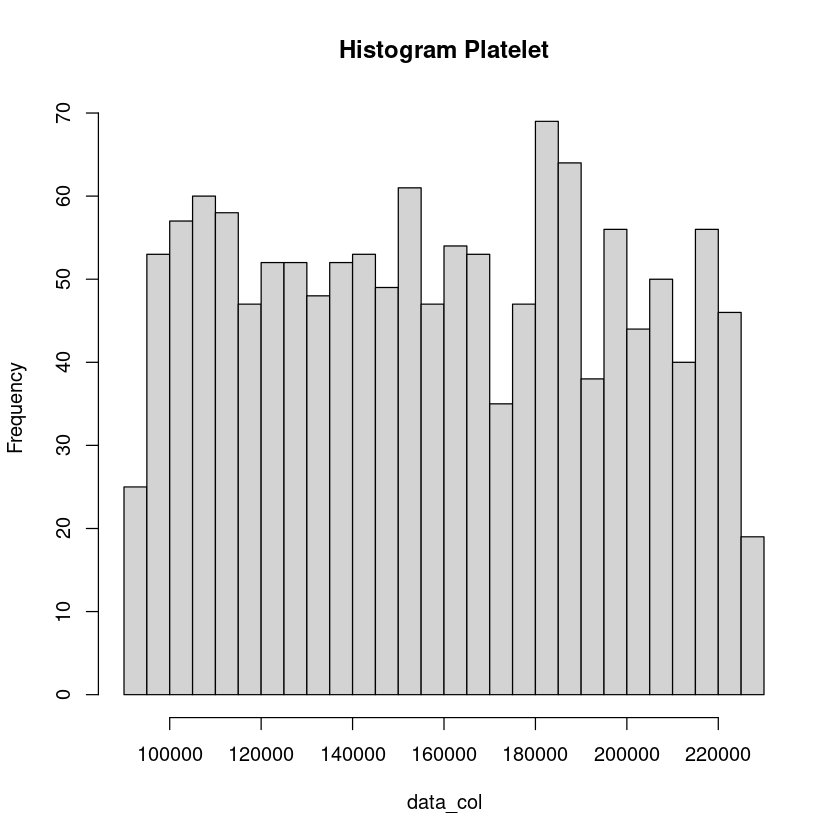

In [127]:
for (col_name in continius_features) {
  data_col <- data[[col_name]]
  num_unique_values <- length(unique(data_col))

  hist(data_col, breaks = num_unique_values %% 50, main = paste("Histogram", col_name))
}


In [128]:
categorical_features


[1] "Gender"                        "Fever"                        
[3] "Nausea.Vomting"                "Headache"                     
[5] "Diarrhea"                      "Fatigue.generalized.bone.ache"
[7] "Jaundice"                      "Epigastric.pain"

In [129]:
data <- data %>%
  mutate_at(categorical_features, factor)


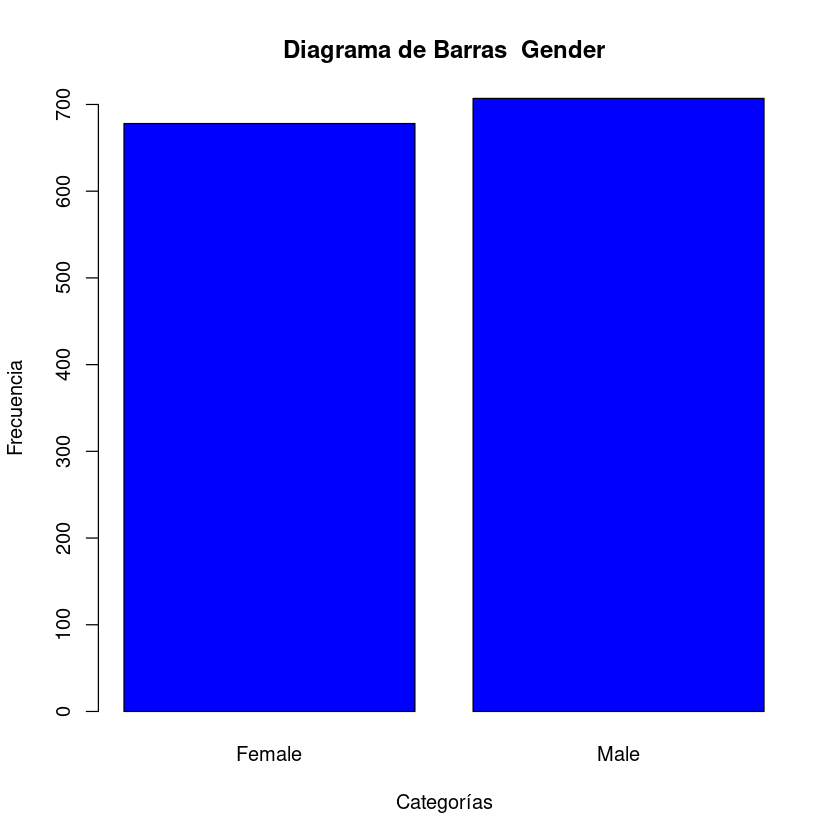

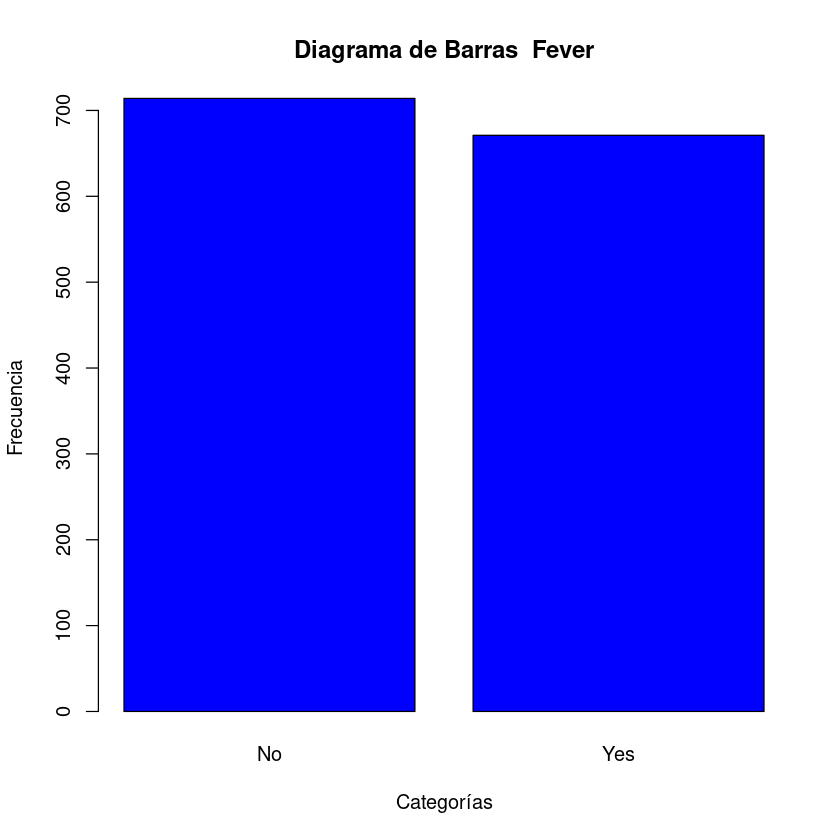

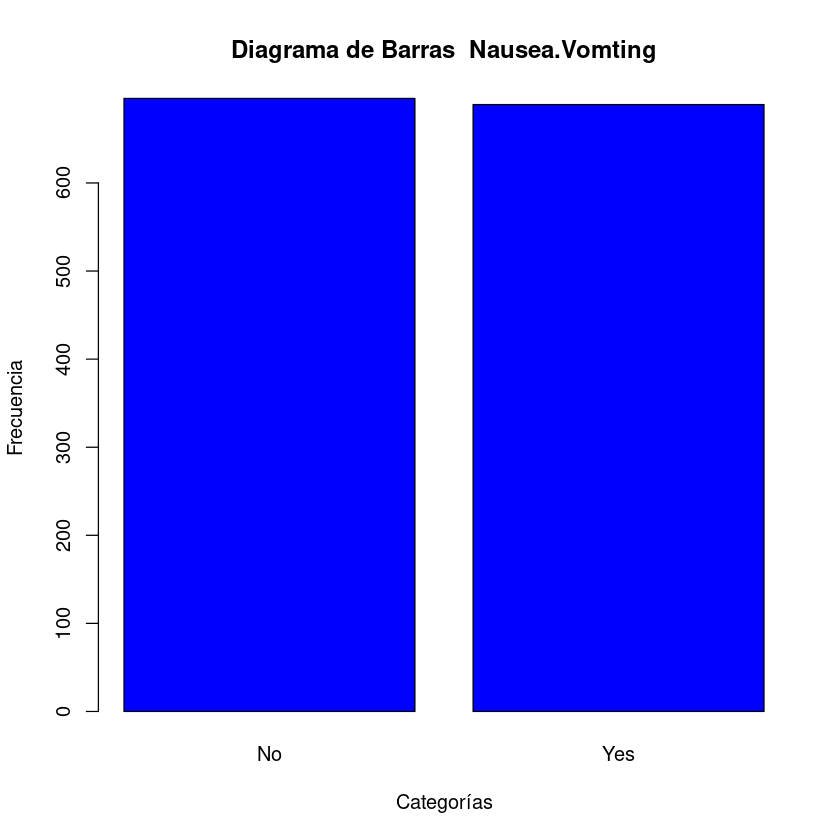

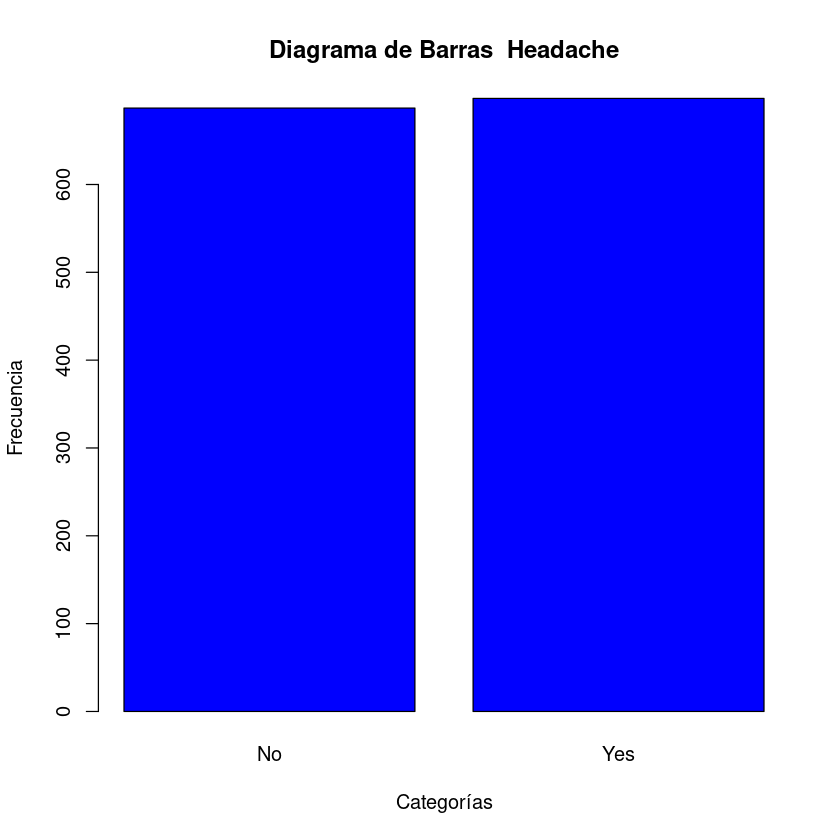

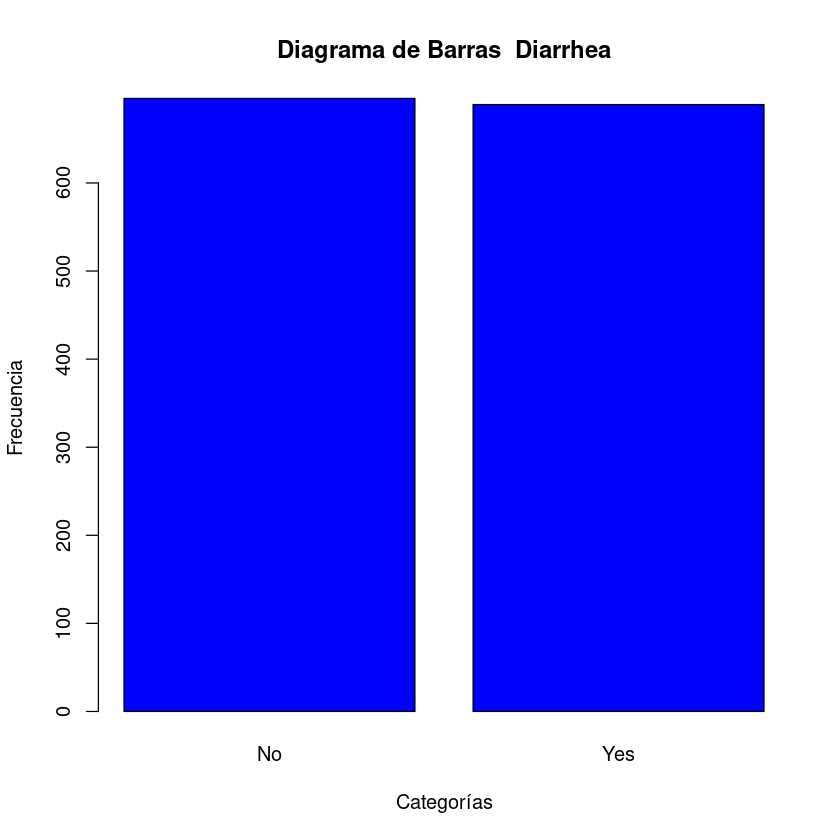

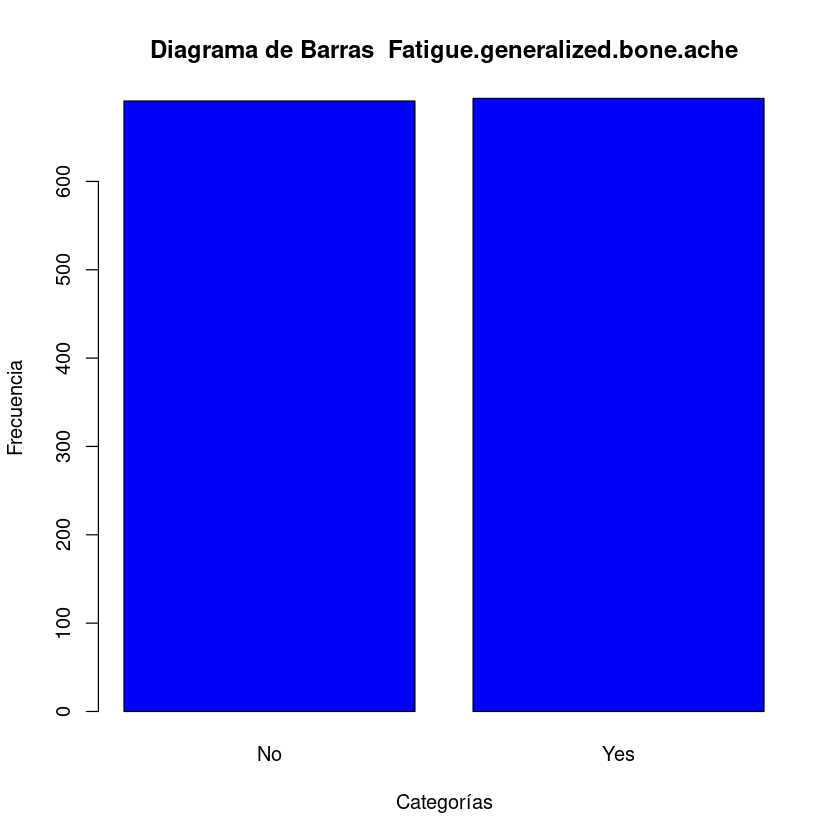

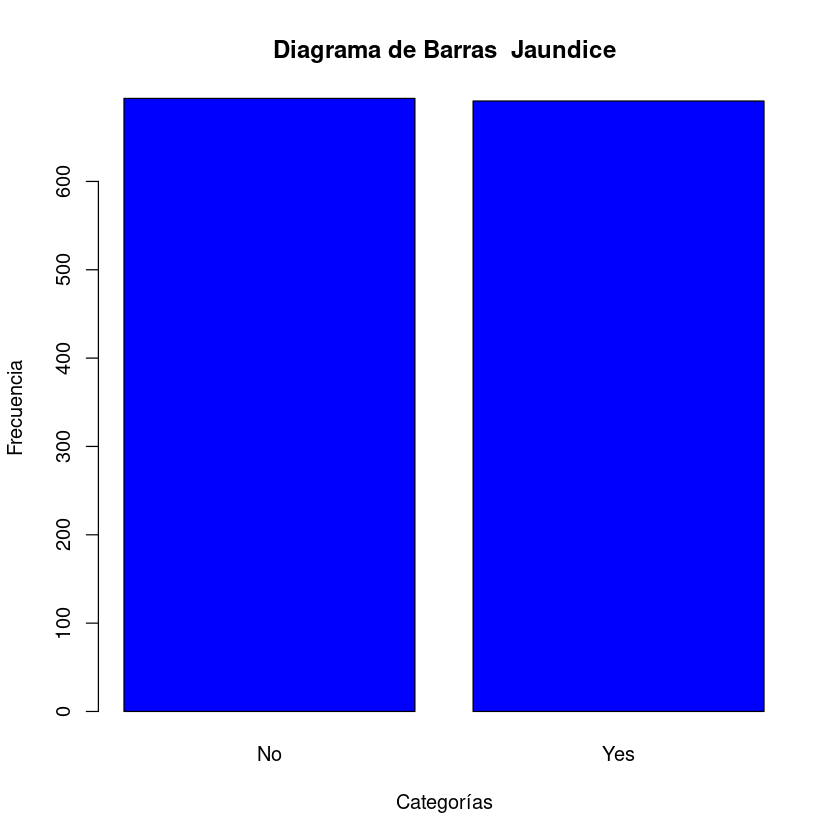

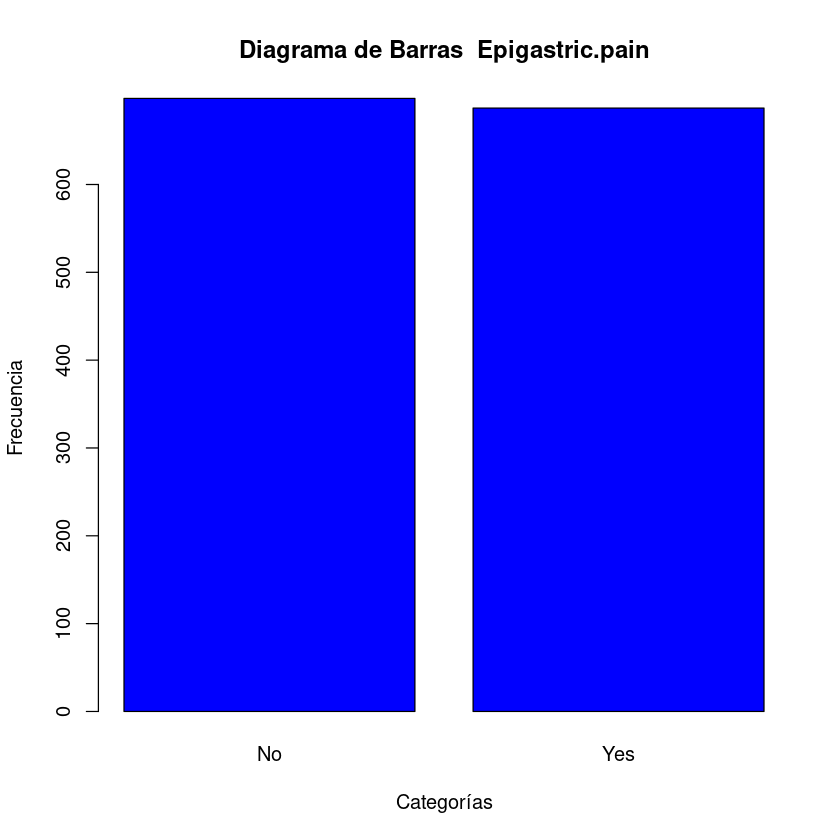

In [130]:
for (categoria in categorical_features) {
  frecuencias <- table(data[[categoria]], useNA = "no")

  barplot(frecuencias,
    names.arg = sort(unique(data[[categoria]])),
    xlab = "Categorías", ylab = "Frecuencia",
    col = "blue", main = paste("Diagrama de Barras ", categoria)
  )
}


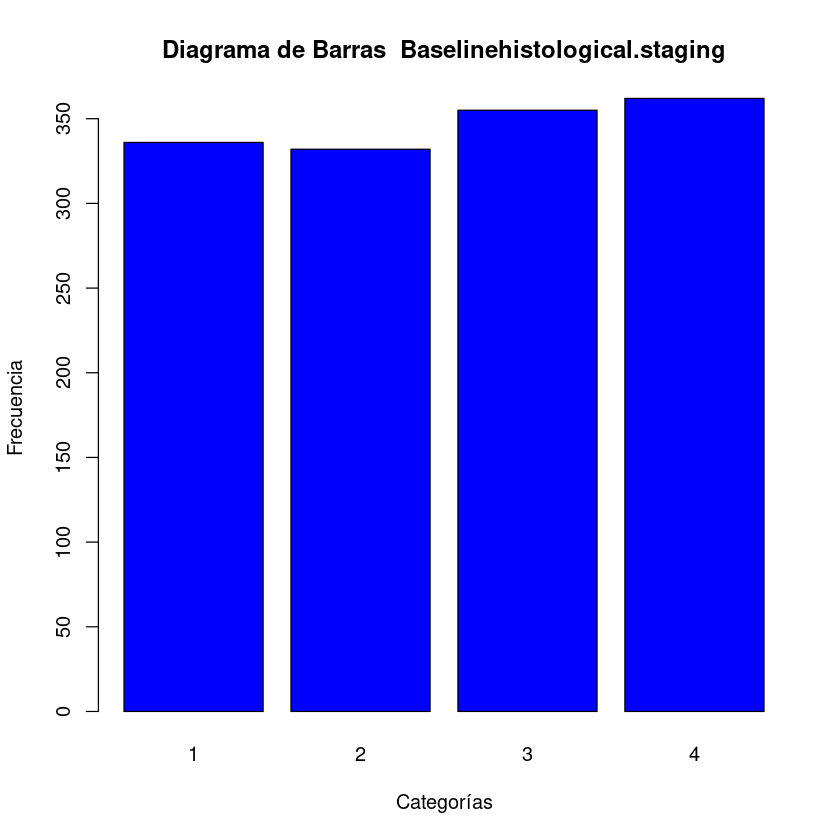

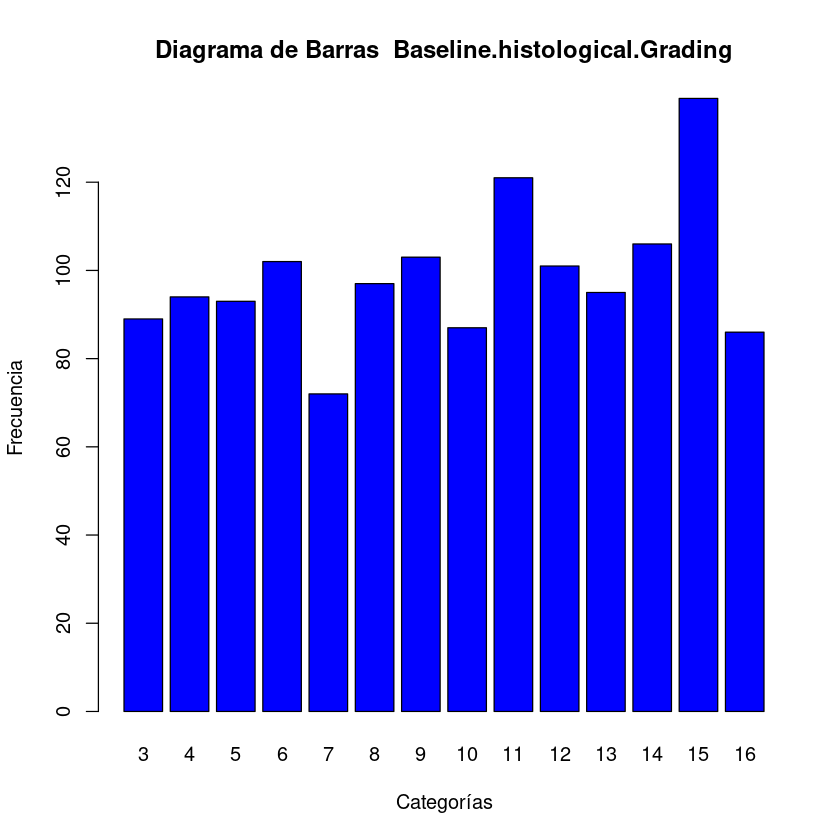

In [131]:
for (categoria in ordinal_features) {
  frecuencias <- table(data[[categoria]], useNA = "no")

  barplot(frecuencias,
    names.arg = sort(unique(data[[categoria]])),
    xlab = "Categorías", ylab = "Frecuencia",
    col = "blue", main = paste("Diagrama de Barras ", categoria)
  )
}


# TIme series

In [132]:
time_series_1


[1] "ALT.1"  "ALT.4"  "ALT.12" "ALT.24" "ALT.36" "ALT.48"

In [133]:
subset_df <- data[, time_series_1]

head(subset_df)


,ALT.1,ALT.4,ALT.12,ALT.24,ALT.36,ALT.48
,<int>,<dbl>,<int>,<int>,<int>,<int>
1,84,52,109,81,5,5
2,123,95,75,113,57,123
3,49,95,107,116,5,5
4,64,109,80,88,48,77
5,104,67,48,120,94,90
6,104,121,96,65,73,114


In [134]:
data_transposed <- t(subset_df)
data_transposed


ALT.1,84,123,49,64,104,104,57,112,83,68,⋯,87,49,50,124,113,59,102,93,97,126
ALT.4,52,95,95,109,67,121,113,80,55,72,⋯,102,77,98,67,52,78,65,123,104,39
ALT.12,109,75,107,80,48,96,118,127,102,127,⋯,53,73,74,90,39,106,99,61,74,68
ALT.24,81,113,116,88,120,65,107,45,97,81,⋯,119,103,50,56,54,127,108,116,47,115
ALT.36,5,57,5,48,94,73,84,96,122,125,⋯,124,58,64,46,86,63,97,87,48,64
ALT.48,5,123,5,77,90,114,80,53,39,43,⋯,65,120,122,127,78,44,64,39,81,71


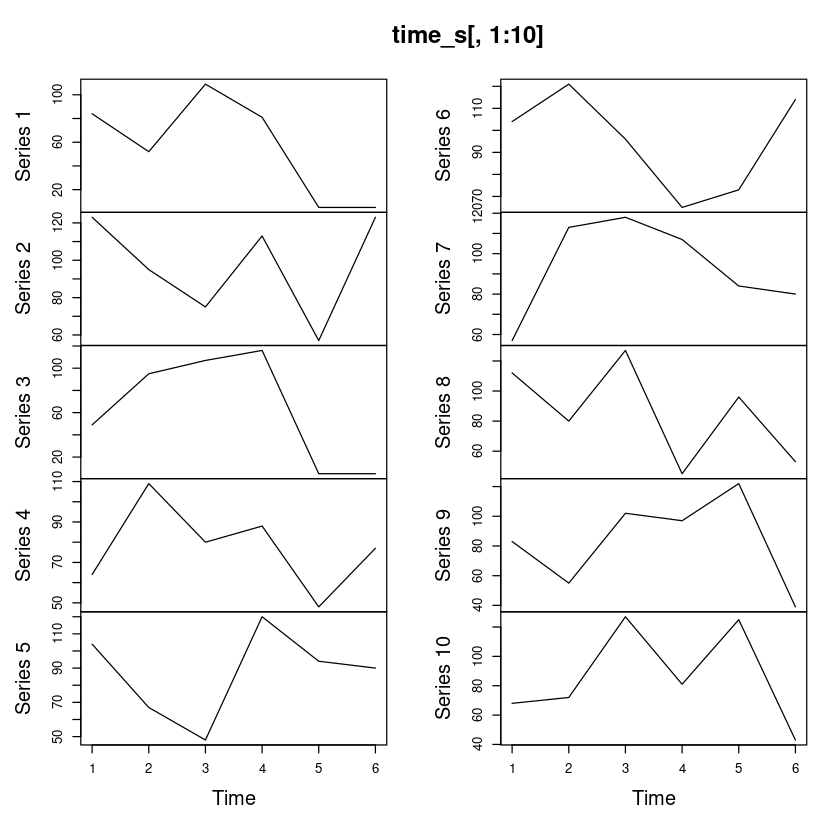

In [135]:
time_s <- ts(data_transposed)
plot.ts(time_s[, 1:10])


In [136]:
df_subset <- data[, time_series_1]

size <- 8
df_plot <- head(df_subset, size)


In [137]:
df_plot


,ALT.1,ALT.4,ALT.12,ALT.24,ALT.36,ALT.48
,<int>,<dbl>,<int>,<int>,<int>,<int>
1,84,52,109,81,5,5
2,123,95,75,113,57,123
3,49,95,107,116,5,5
4,64,109,80,88,48,77
5,104,67,48,120,94,90
6,104,121,96,65,73,114
7,57,113,118,107,84,80
8,112,80,127,45,96,53


In [138]:
library(tidyr)


In [139]:
df_plot_long <- df_plot %>%
  mutate(RowID = row_number())

df_plot_long <- df_plot_long %>%
  pivot_longer(
    cols = starts_with("ALT"),
    names_to = "Time",
    values_to = "Value"
  )


df_plot_long$Time <- factor(df_plot_long$Time,
  levels = paste0("ALT.", c(1, 4, 12, 24, 36, 48)),
  ordered = TRUE
)


head(df_plot_long)


RowID,Time,Value
<int>,<ord>,<dbl>
1,ALT.1,84
1,ALT.4,52
1,ALT.12,109
1,ALT.24,81
1,ALT.36,5
1,ALT.48,5


In [140]:
df_plot_long %>%
  group_by(Time) %>%
  summarise(
    mean_value = mean(Value),
    sd_value = sd(Value)
  ) -> df_mean_orders


In [141]:
df_mean_orders$Value <- 0
df_mean_orders$RowID <- 0
df_mean_orders


Time,mean_value,sd_value,Value,RowID
<ord>,<dbl>,<dbl>,<dbl>,<dbl>
ALT.1,87.125,27.72538,0,0
ALT.4,91.500,23.77273,0,0
ALT.12,95.000,25.98901,0,0
ALT.24,91.875,26.99438,0,0
ALT.36,57.750,36.56599,0,0
ALT.48,68.375,44.74032,0,0


In [142]:
library(RColorBrewer)

colors <- brewer.pal(n = 4, name = "Blues")
colors


[1] "#EFF3FF" "#BDD7E7" "#6BAED6" "#2171B5"

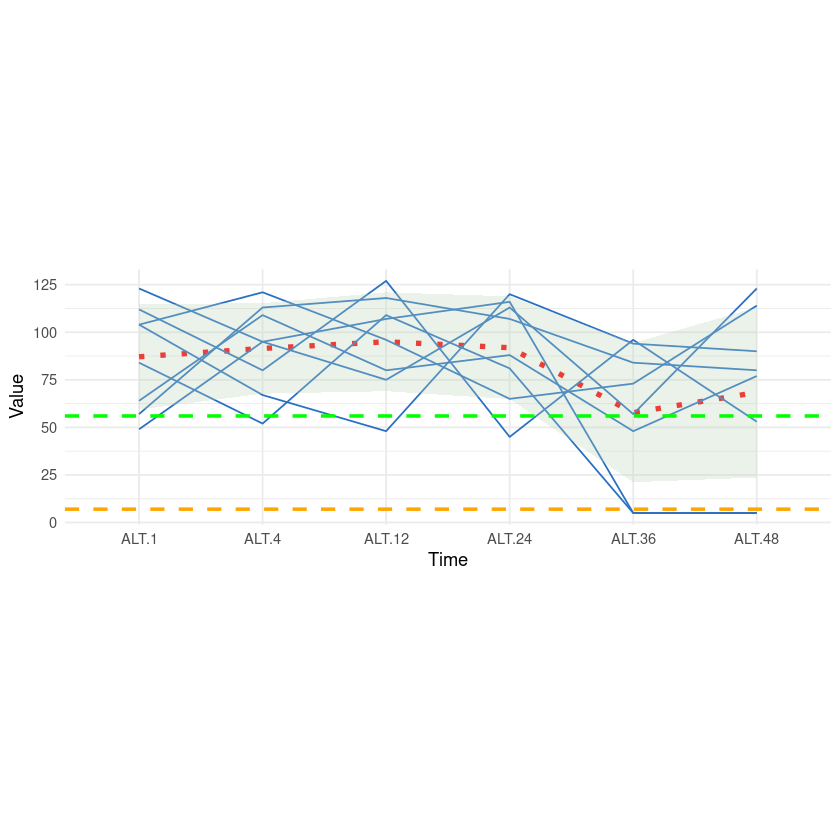

In [143]:
# Assuming df_mean_orders contains 'Time', 'mean_value', and 'sd_value'
p <- ggplot(data = df_plot_long, aes(x = Time, y = Value, group = RowID)) +
  geom_line(data = df_mean_orders, aes(x = Time, y = mean_value), color = "red", linetype = "dotted", linewidth = 1.5) +
  geom_line(color = "#2870c2") +
  geom_ribbon(
    data = df_mean_orders,
    aes(x = Time, ymin = mean_value - sd_value, ymax = mean_value + sd_value),
    fill = "#bad3b9", alpha = 0.3
  ) +
  geom_hline(yintercept = 56, linetype = "dashed", color = "green", size = 1) + # Max normal ALT value # https://www.ncbi.nlm.nih.gov/books/NBK559278/
  geom_hline(yintercept = 7, linetype = "dashed", color = "orange", size = 1) + # Min normal ALT value
  theme_minimal() +
  labs(x = "Time", y = "Value") +
  theme(
    aspect.ratio = 1 / 3
  ) +
  theme(legend.position = "none")
p


# Save dataset

In [144]:
write.csv(data, file = "./dataset/ds-final.csv", row.names = FALSE)
